# Especialização em Inteligência Artificial

**Aprendizado de Máquina - Aula 4.4: Algoritmos de comitê**

Código de exemplo desenvolvido pelo docente [Adriano Rivolli](mailto:rivolli@utpfr.edu.br)

*O código apresenta como usar os algoritmos de comitês*

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

#Comparação dos comitês

In [ ]:
# Carregando o dataset e separando o conjunto de treinamento/teste
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Initialize classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to compare performance
rf_scores = cross_val_score(rf_clf, X, y, cv=5)
et_scores = cross_val_score(et_clf, X, y, cv=5)
ada_scores = cross_val_score(ada_clf, X, y, cv=5)

# Print average accuracy scores
print("Random Forest Average Accuracy:", rf_scores.mean())
print("Extra Trees Average Accuracy:", et_scores.mean())
print("AdaBoost Average Accuracy:", ada_scores.mean())

Random Forest Average Accuracy: 0.9560937742586555
Extra Trees Average Accuracy: 0.9613724576929048
AdaBoost Average Accuracy: 0.9754075454122031


In [ ]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Initialize classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to compare performance
rf_scores = cross_val_score(rf_clf, X, y, cv=5)
et_scores = cross_val_score(et_clf, X, y, cv=5)
ada_scores = cross_val_score(ada_clf, X, y, cv=5)

# Print average accuracy scores
print("Random Forest Average Accuracy:", rf_scores.mean())
print("Extra Trees Average Accuracy:", et_scores.mean())
print("AdaBoost Average Accuracy:", ada_scores.mean())

Random Forest Average Accuracy: 0.9393639740018569
Extra Trees Average Accuracy: 0.9554982977406375
AdaBoost Average Accuracy: 0.26765552460538533


## Random Forest e importância dos atributos

In [ ]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_
feature_importances

array([0.04273532, 0.01841607, 0.03235586, 0.06554432, 0.00492278,
       0.0215403 , 0.03575723, 0.09713207, 0.00299104, 0.00416961,
       0.00549249, 0.0036488 , 0.02266036, 0.04340255, 0.00285216,
       0.00446163, 0.01050978, 0.00455161, 0.00262513, 0.00441203,
       0.15440975, 0.01855646, 0.07875321, 0.12814922, 0.01403881,
       0.01112289, 0.02709895, 0.11884561, 0.01047863, 0.00836533])

In [ ]:
rk_features = {}
for feature, importance in zip(feature_names, feature_importances):
    rk_features[feature] = importance

for feature in sorted(rk_features, key=rk_features.get, reverse=True):
    print(feature + ':', rk_features[feature].round(2))

worst radius: 0.15
worst area: 0.13
worst concave points: 0.12
mean concave points: 0.1
worst perimeter: 0.08
mean area: 0.07
area error: 0.04
mean radius: 0.04
mean concavity: 0.04
mean perimeter: 0.03
worst concavity: 0.03
perimeter error: 0.02
mean compactness: 0.02
worst texture: 0.02
mean texture: 0.02
worst smoothness: 0.01
worst compactness: 0.01
concavity error: 0.01
worst symmetry: 0.01
worst fractal dimension: 0.01
radius error: 0.01
mean smoothness: 0.0
concave points error: 0.0
compactness error: 0.0
fractal dimension error: 0.0
mean fractal dimension: 0.0
texture error: 0.0
mean symmetry: 0.0
smoothness error: 0.0
symmetry error: 0.0


#XGBoost

Parte do código foi adaptado de: https://medium.com/@24littledino/xgboost-classification-in-python-f29cc2c50a9b

In [ ]:
# Install
!pip install xgboost
# Import
import xgboost as xgb

In [ ]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_val, y_train, y_val = train_test_split(cancer.data, cancer.target, test_size=0.2)

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.956140350877193


In [ ]:
digits = load_breast_cancer()
X, y = digits.data, digits.target
X_train, X_val, y_train, y_val = train_test_split(digits.data, digits.target, test_size=0.3)

xgb_classifier = xgb.XGBClassifier(eta = 0.5, gamma=0.05, objective='multi:softmax', eval_metric='logloss', num_class=10)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.9473684210526315


In [ ]:
from sklearn.datasets import fetch_openml

# Load the Iris dataset
titanic = fetch_openml(name='titanic', version='1', parser='auto')
X, y = titanic.data, titanic.target

features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
x_train, x_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=65)

#Transforming data
x_train['sex'] = x_train['sex'].cat.codes
x_test['sex'] = x_test['sex'].cat.codes

y_train = y_train.cat.codes
y_test = y_test.cat.codes

In [ ]:
# XGBoost (different learning rate)
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = []
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(x_train, y_train)
    train_XG.append(xgb_classifier.score(x_train, y_train))
    test_XG.append(xgb_classifier.score(x_test, y_test))

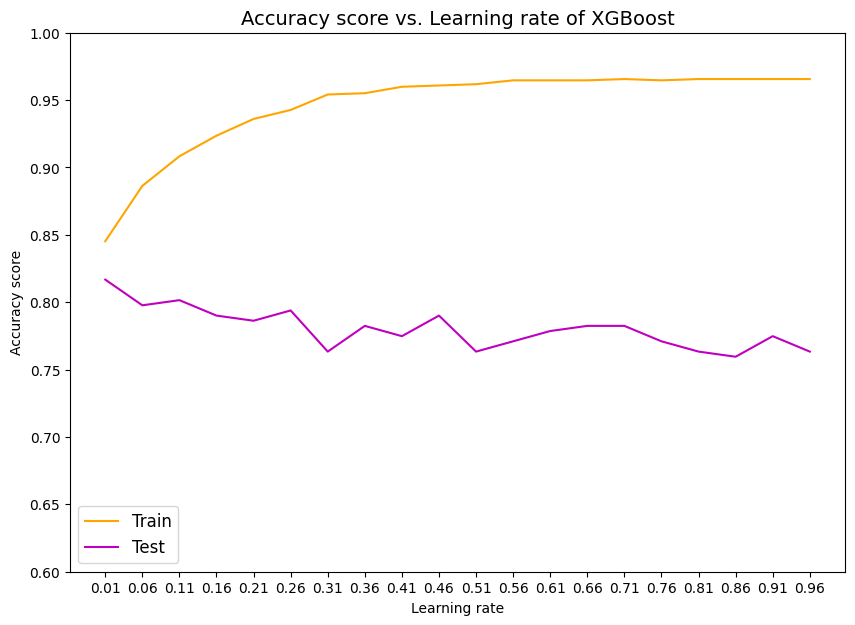

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

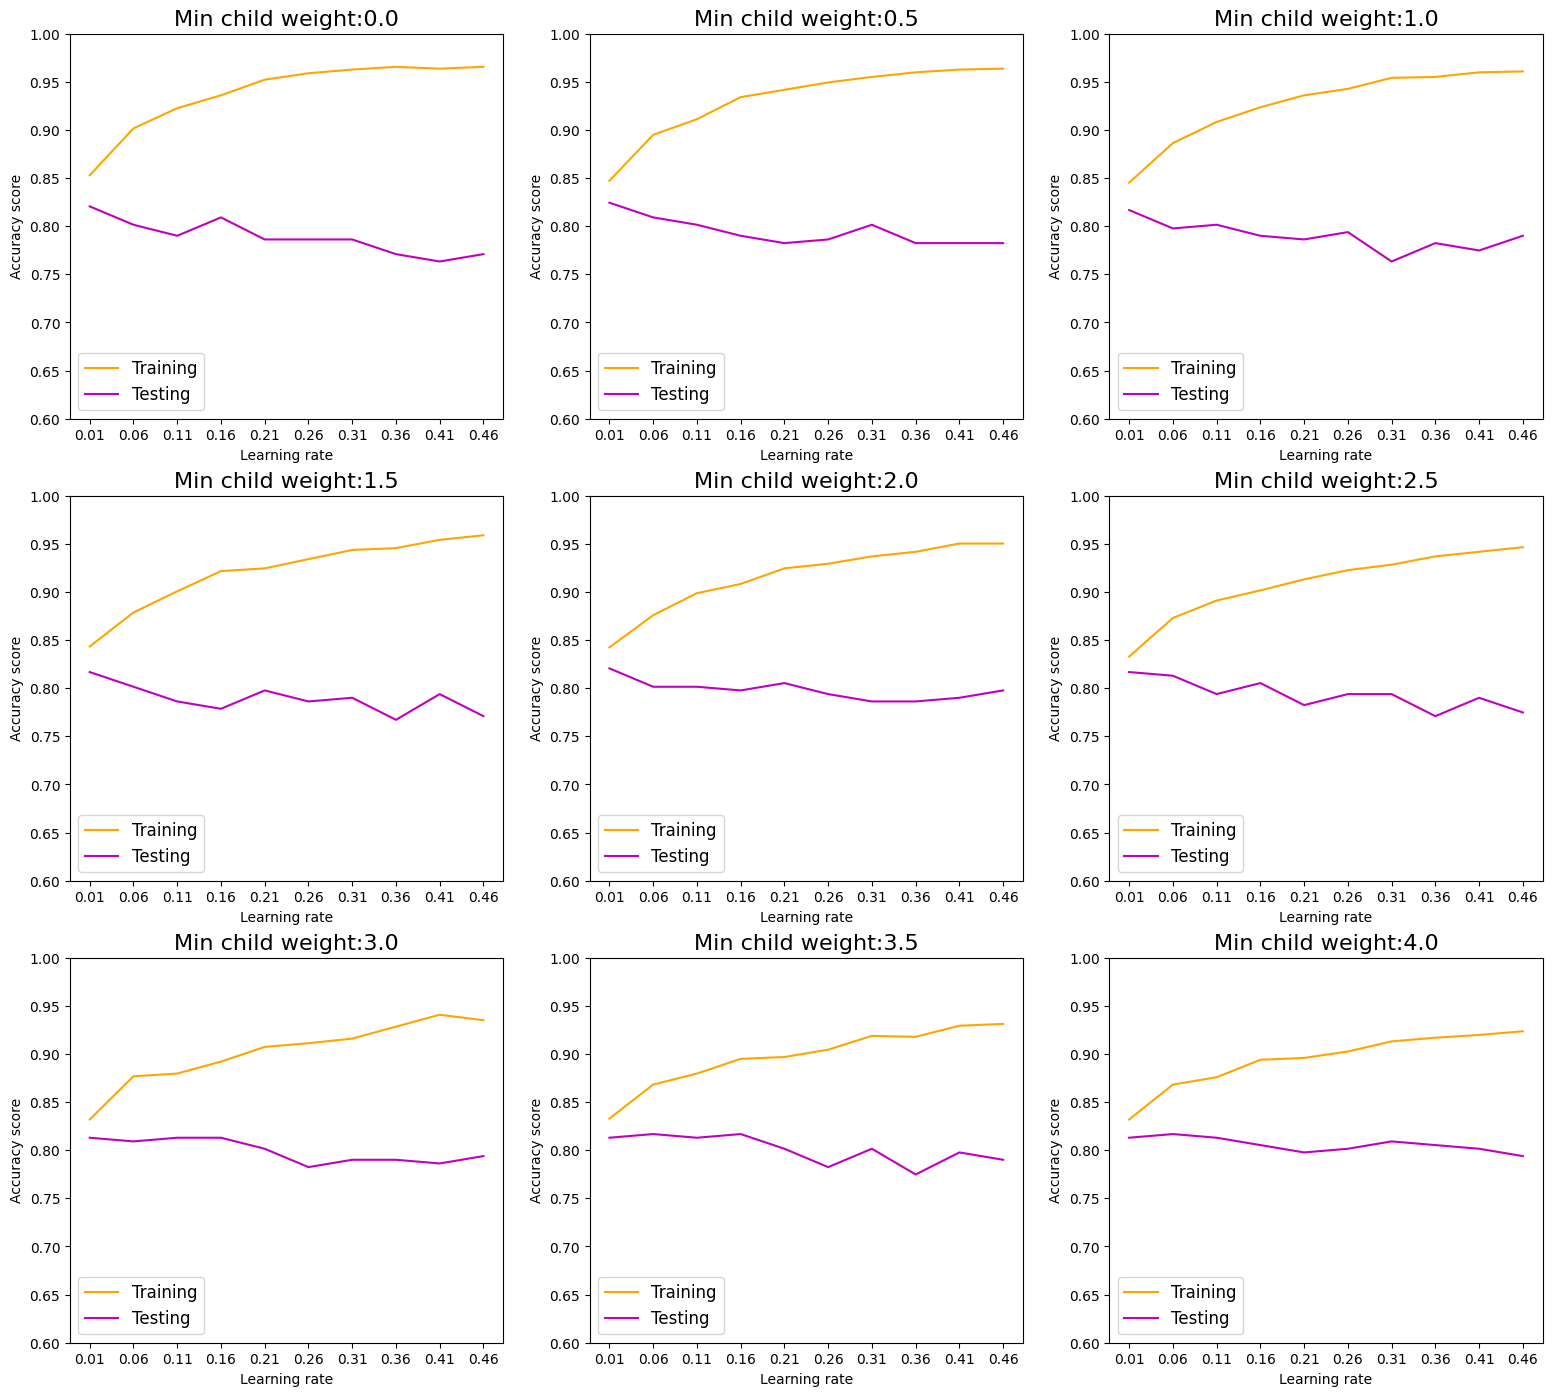

In [ ]:
learning_rate_range = np.arange(0.01, 0.5, 0.05)
weight_range = np.arange(0, 4.5, 0.5)

fig = plt.figure(figsize=(19, 17))
idx = 1
for weight in weight_range:
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
        xgb_classifier.fit(x_train, y_train)
        train.append(xgb_classifier.score(x_train, y_train))
        test.append(xgb_classifier.score(x_test, y_test))

    fig.add_subplot(3, 3, idx)
    idx += 1
    plt.plot(learning_rate_range, train, c='orange', label='Training')
    plt.plot(learning_rate_range, test, c='m', label='Testing')
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    title = "Min child weight:" + str(weight)
    plt.title(title, size=16)
plt.show()